<a href="https://colab.research.google.com/github/dong1645/lectures-bigphys/blob/master/Untitled2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Period: 2.8099258924162904 seconds
Frequency: 0.3558812717085885 Hz
k:  100 N/m


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


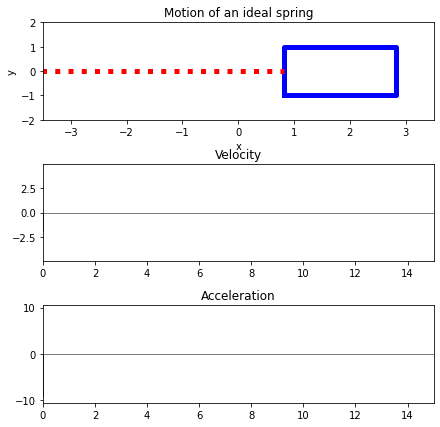

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import random

fig = plt.figure(figsize=(7,7))
ax1 = fig.add_subplot(1,1,1)
ax2 = fig.add_subplot(2,1,1)
ax3 = fig.add_subplot(3,1,1)
fig.subplots_adjust(hspace=.45)

# Spring data
k = 100
m = 20
w = np.sqrt(k/m)
phi = 2
A = 2

period = 2*np.pi/w
frequency = 1/period

print("Period:",period,"seconds",sep=" ")
print("Frequency:",frequency,"Hz",sep=" ")
print("k: ",k,"N/m",sep=" ")

def fun(t):
    global w,phi,A
    return A*np.sin(w*t+phi)

def vel(t):
    global w,phi,A
    return A*w*np.cos(w*t+phi)

def acceleration(t):
    global w,phi,A
    return -A*w**2*np.sin(w*t+phi)


def position(x):
    x1 = x-1
    x2 = x+1
    y1 = 1 
    y2 = -1

    p1 = [x1,y2]
    p2 = [x2,y2]
    p3 = [x2,y1]
    p4 = [x1,y1]
    return [p1,p2,p3,p4]

counter = 0
xt = [0]
yt = [0]
vy = [0]
acy = [0]

def animate(i):
    global counter, xt,yt,A,vy,acy
    ax3.clear()

    plt.subplot(311)
    # configure  X axes
    plt.xlim(-3.5,3.5)

    # configure  Y axes
    plt.ylim(-2,2)

    # labels
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("Motion of an ideal spring")
    
    p1 = [position(fun(counter))[0][0],position(fun(counter))[0][1]]
    p2 = [position(fun(counter))[1][0],position(fun(counter))[1][1]]
    p3 = [position(fun(counter))[2][0],position(fun(counter))[2][1]]
    p4 = [position(fun(counter))[3][0],position(fun(counter))[3][1]]

    x = [p1[0],p2[0],p3[0],p4[0],p1[0]]
    y = [p1[1],p2[1],p3[1],p4[1],p1[1]]
    linex = [-4,p1[0]]
    liney = [0,0]
    
    plt.plot(x,y,lw=5,color="blue")
    plt.plot(linex,liney,color="red",ls=":",lw=5)

    plt.subplot(312)
    xt.append(counter)
    vy.append(vel(counter))
    plt.title("Velocity")
    plt.xlim(0,15)
    plt.ylim(-A*w-0.5,A*w+0.5)
    plt.plot(xt,vy,lw=1,color="green")
    plt.plot([0,15],[0,0],lw=0.5,color="black")

    plt.subplot(313)
    acy.append(acceleration(counter))
    plt.title("Acceleration")
    plt.xlim(0,15)
    plt.ylim(-A*w**2-0.5,A*w**2+0.5)
    plt.plot(xt,acy,lw=1,color="green")
    plt.plot([0,15],[0,0],lw=0.5,color="black")
    
    counter += 0.1
    

ani = animation.FuncAnimation(fig,animate,interval=2)
plt.show()